In [11]:
%matplotlib inline
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import warnings
import statsmodels.api as sm
warnings.filterwarnings('ignore')
from pylab import rcParams
rcParams['figure.figsize'] = 12, 9

## Итоговое задание

1. Зарегистрироваться на __[Kaggle](https://www.kaggle.com)__
2. Вступить в соревнование __[House Prices: Advanced Regression Techniques](https://www.kaggle.com/c/house-prices-advanced-regression-techniques)__
3. Скачать данные
4. Обработать
5. Обучить модель
6. Сделать предсказание

Для успешного прохождения необходимо получить значение метрики меньше 0.12645

## Итоговое задание

Первым делом, необходимо обратить внимание на метрику 

$$
L = \sqrt{
    \frac{1}{N} \sum_n (\ln y_n - \ln \tilde{y}_n)^2
}
$$

In [12]:
import zipfile

z = zipfile.ZipFile("../data/house-prices-advanced-regression-techniques.zip")
df = pd.read_csv(z.open("train.csv"))

df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Трансформация признаков

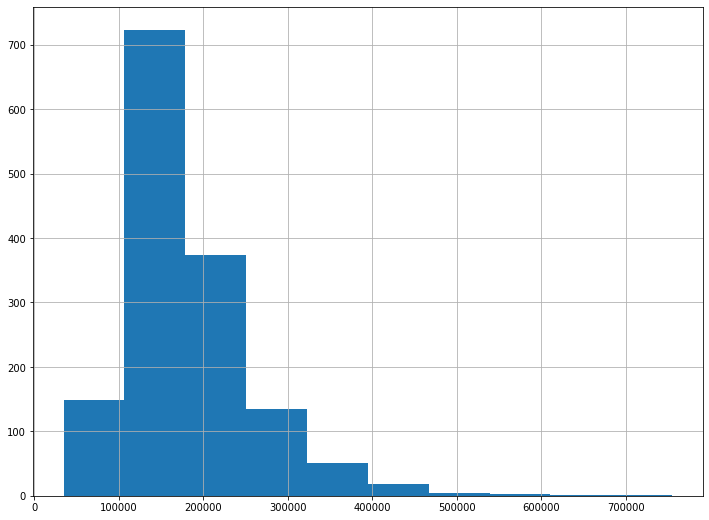

In [13]:
df['SalePrice'].hist();

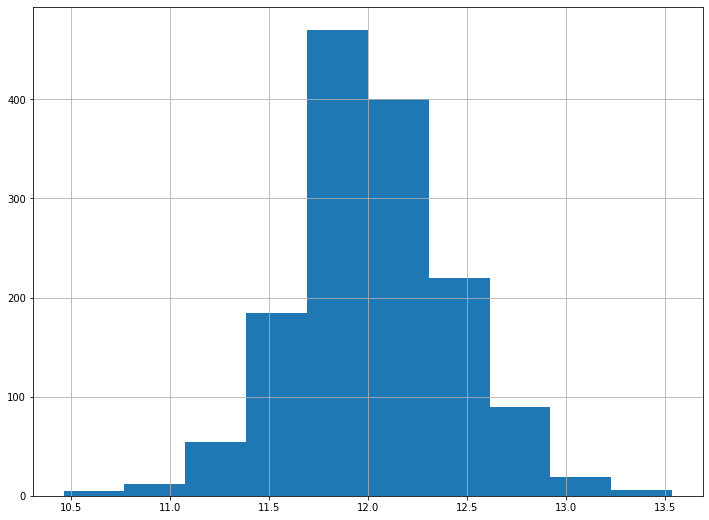

In [14]:
np.log1p(df['SalePrice']).hist();

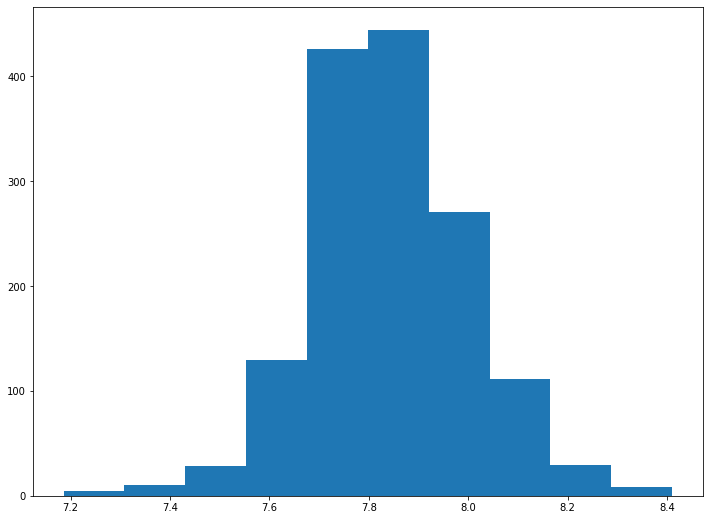

In [15]:
from sklearn.preprocessing import power_transform

tmp = power_transform(df['SalePrice'].values.reshape((-1, 1)), 
                      method='box-cox', standardize=False)
plt.hist(tmp);

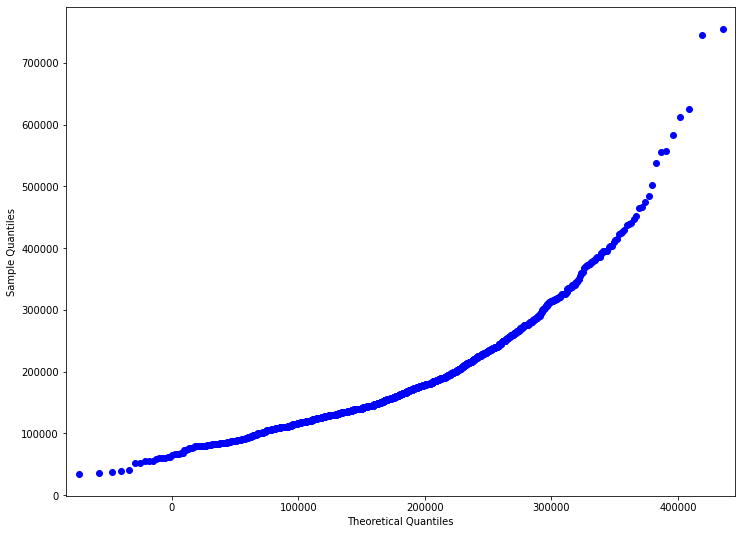

In [16]:
sm.qqplot(df['SalePrice'], 
          loc=df['SalePrice'].mean(), 
          scale=df['SalePrice'].std());

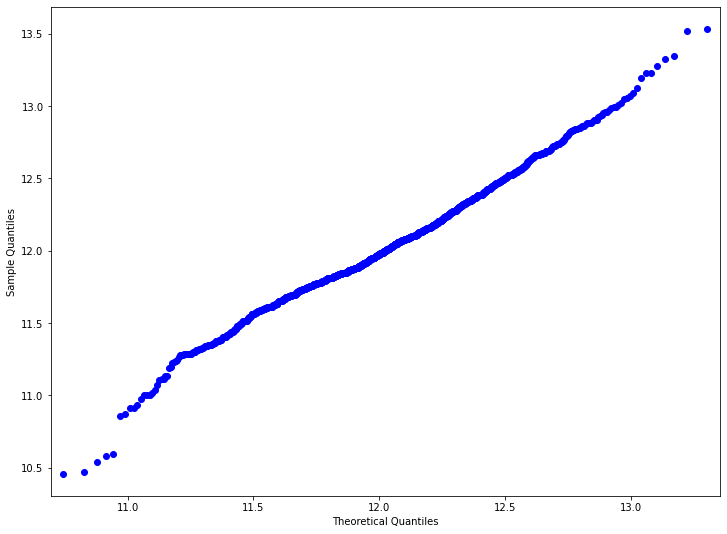

In [17]:
tmp = np.log1p(df['SalePrice'])
sm.qqplot(tmp, loc=tmp.mean(), scale=tmp.std());

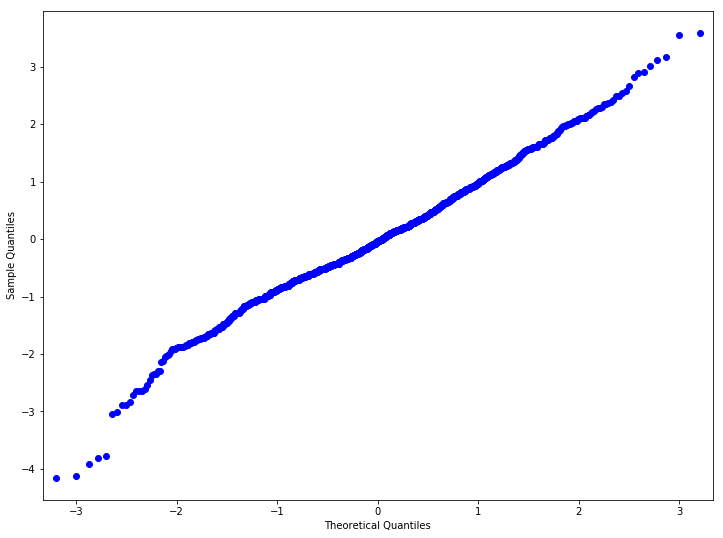

In [104]:
from sklearn.preprocessing import power_transform

tmp = power_transform(df['SalePrice'].values.reshape((-1, 1)), method='box-cox', standardize=True)
sm.qqplot(tmp.ravel(), loc=tmp.mean(), scale=tmp.std());

## Обработка категориальных данных

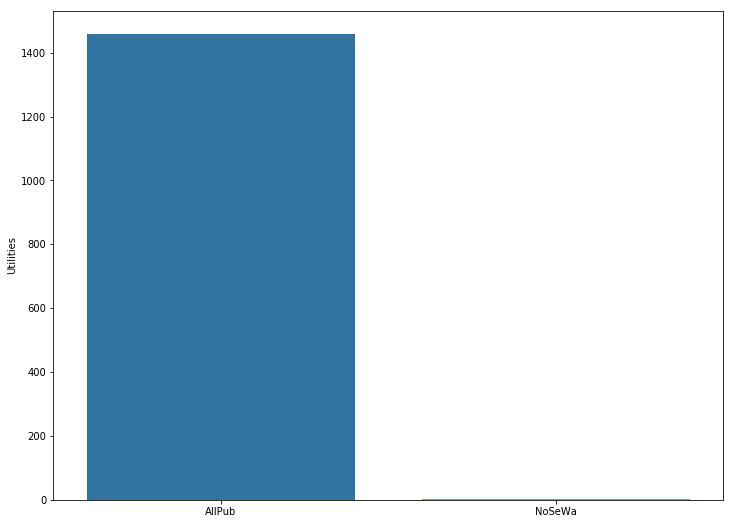

In [105]:
sns.barplot(df['Utilities'].unique(), df['Utilities'].value_counts());

In [106]:
# количество пропусков
df['Fence'].isnull().sum()

1179

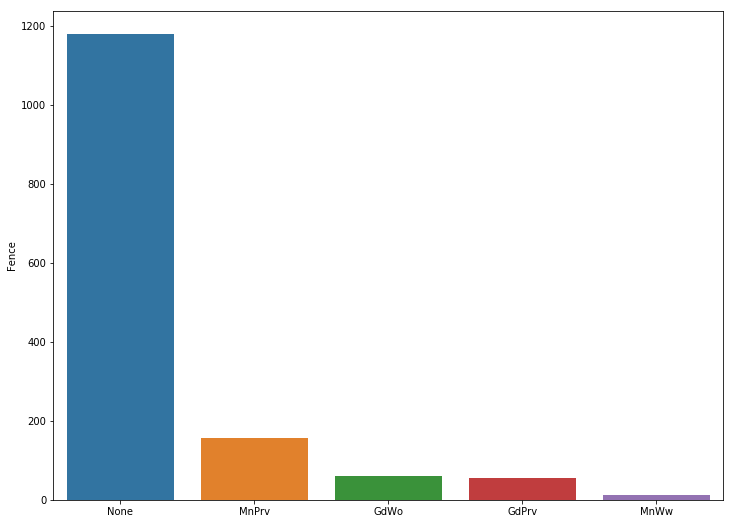

In [107]:
df['Fence'] = df['Fence'].fillna("None")
sns.barplot(df['Fence'].unique(), df['Fence'].value_counts());

## Создание новых признаков

Опыт подсказывает, что полная площадь дома должна хорошо влиять на стоимость.

In [108]:
df['TotalSF'] = df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF']

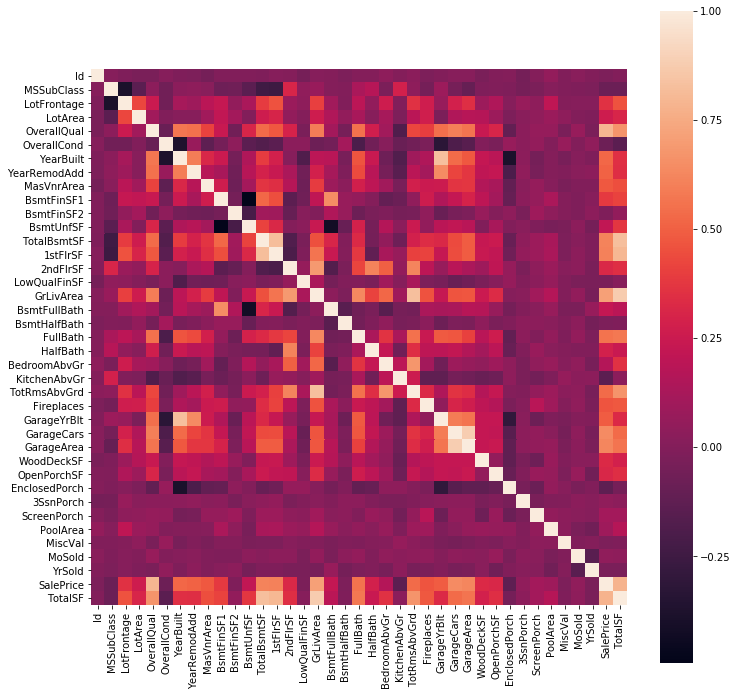

In [109]:
corrmat = df.corr()
plt.subplots(figsize=(12,12))
sns.heatmap(corrmat, square=True);

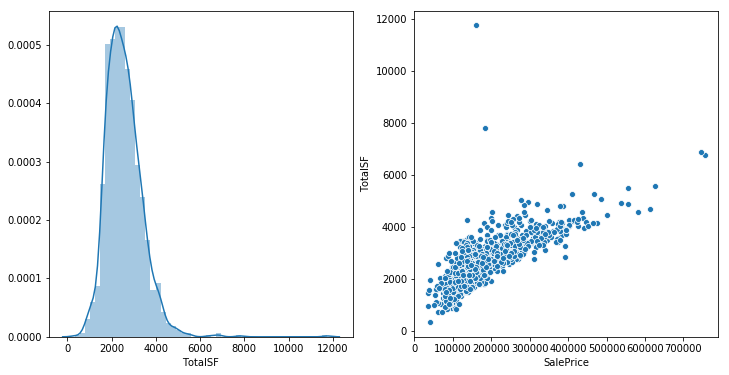

In [116]:
plt.figure(figsize=(12, 6))
plt.subplot(121)
sns.distplot(df['TotalSF'])
plt.subplot(122)
sns.scatterplot(df['SalePrice'], df['TotalSF'])
plt.show()